In [1]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/FINAL/CA_5-STATES_NETWORK__61_COMPLETE.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       'mean [ state ] of turtles with [ breed = clients ]',
       'mean [ state ] of turtles with [ breed = service-providers ]',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y', 'count links'],
      dtype='object')

In [3]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y','links']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links
0,7,1.5,1,10,0.05,0,2.776316,2.750000,0.000000,0.000000,0.310417,0.0625,0.00000,0.000000,15
1,1,1.5,1,10,0.05,0,2.631579,2.500000,0.000000,0.000000,0.347917,0.0875,0.00000,0.000000,19
2,4,1.5,1,10,0.05,0,2.605263,3.000000,0.000000,0.000000,0.304167,0.0125,0.00000,0.000000,13
3,6,1.5,1,10,0.15,0,2.808824,2.333333,0.029167,0.000000,0.257500,0.1125,0.00000,0.000000,17
4,12,1.5,1,40,0.15,0,1.882353,2.250000,0.037500,0.000000,0.341667,0.0125,0.00000,0.000000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,162,5.5,5,40,0.15,86,2.852941,3.166667,0.710870,1.570570,0.649599,22.5375,1.31844,1.077992,1357
14738,162,5.5,5,40,0.15,87,3.250000,3.583333,0.713088,1.567405,0.651124,22.4125,0.99344,0.765492,1367
14739,162,5.5,5,40,0.15,88,2.764706,3.250000,0.713999,1.564557,0.652444,22.3000,0.73094,1.102992,1376
14740,162,5.5,5,40,0.15,89,2.867647,2.833333,0.714271,1.562342,0.653467,22.2125,0.61844,0.627992,1383


In [4]:
df4.groupby(['radius-of-interaction','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean})

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0         2.375313        2.405864      0.022029   
                      1         2.676820        2.731481      0.035995   
                      2         2.798982        2.857253      0.053017   
                      3         2.893489        2.974537      0.063557   
                      4         2.761939        2.856481      0.069691   
...                                  ...             ...           ...   
5.5                   86        2.832090        2.743056      0.670183   
                      87        2.860476        2.827160      0.670606   
                      88        2.774804        2.764660      0.671520   
                      89        2.721263        2.710648      0.672089   
                      90        2.937266        2.901235      0.672866   

                               paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                                 
1.5                   0     0.000000   0.298373     0.057870    0.000000   
                      1     0.000000   0.360343     0.178704   -0.334756   
                      2     0.000000   0.387997     0.307639   -0.327793   
                      3     0.000000   0.409521     0.555324   -0.318563   
                      4     0.000000   0.418883     0.941898   -0.297909   
...                              ...        ...          ...         ...   
5.5                   86    1.844673   0.522742    40.717361    0.040052   
                      87    1.839932   0.523891    40.525231    0.035654   
                      88    1.835613   0.525065    40.310417    0.049080   
                      89    1.831974   0.526067    40.165741    0.018293   
                      90    1.829337   0.526839    40.059028    0.021534   

                            centroid-y  
radius-of-interaction step              
1.5                   0       0.000000  
                      1       0.070847  
                      2       0.091928  
                      3       0.102239  
                      4       0.124579  
...                                ...  
5.5                   86     -0.278331  
                      87     -0.285044  
                      88     -0.274396  
                      89     -0.292914  
                      90     -0.257034  

[273 rows x 8 columns]

In [5]:
df_move=df4.groupby(['movement-steps','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean
       ,'links':np.mean})
df_move

mood_clients  mood_providers  cluster_coef     paths  \
movement-steps step                                                         
1              0         2.358934        2.405093      0.169801  0.000000   
               1         2.676928        2.761574      0.266377  0.326172   
               2         2.813416        2.830247      0.321103  0.407970   
               3         2.867694        3.064043      0.348383  0.744667   
               4         2.764131        2.810185      0.369524  0.877719   
...                           ...             ...           ...       ...   
5              86        2.825504        2.831019      0.469969  1.127532   
               87        2.867229        2.802469      0.471764  1.125428   
               88        2.773739        2.832562      0.474512  1.123371   
               89        2.737024        2.721451      0.476122  1.121742   
               90        2.935338        2.940586      0.477423  1.120048   

                     closeness  betweenness  centroid-x  centroid-y  \
movement-steps step                                                   
1              0      0.330230    63.579861    0.000000    0.000000   
               1      0.330607    60.199537   -0.038029   -0.247807   
               2      0.337887    60.904167   -0.036263   -0.248155   
               3      0.345789    58.283333   -0.034431   -0.242924   
               4      0.348038    57.779398   -0.029900   -0.253219   
...                        ...          ...         ...         ...   
5              86     0.516120    33.044213   -0.189919    0.140539   
               87     0.517245    32.882639   -0.198715    0.139150   
               88     0.518319    32.775463   -0.160058    0.127576   
               89     0.519333    32.634491   -0.163762    0.072020   
               90     0.520356    32.564583   -0.163067    0.080122   

                          links  
movement-steps step              
1              0      70.018519  
               1      94.370370  
               2     109.018519  
               3     121.203704  
               4     131.462963  
...                         ...  
5              86    704.944444  
               87    709.833333  
               88    714.944444  
               89    719.814815  
               90    724.259259  

[273 rows x 9 columns]

In [6]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

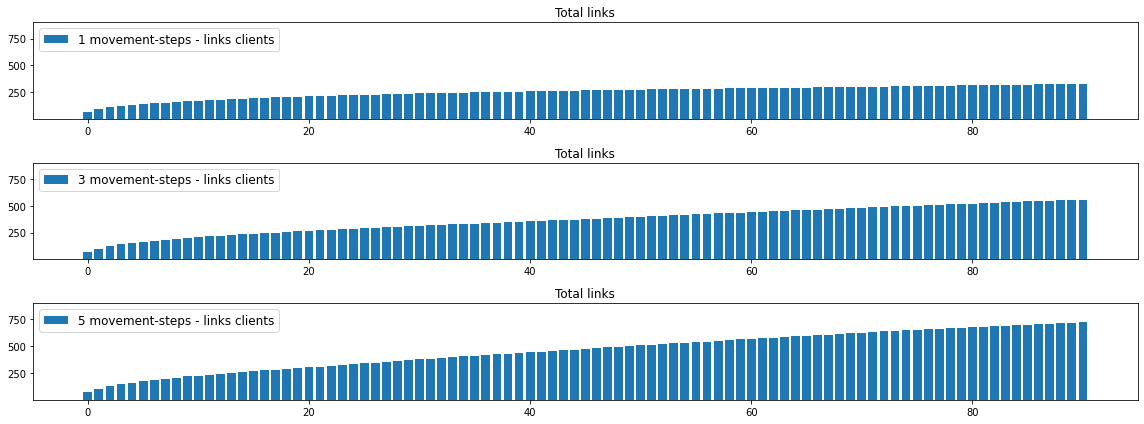

In [7]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['links'], label='{} movement-steps - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,900)
plt.show()

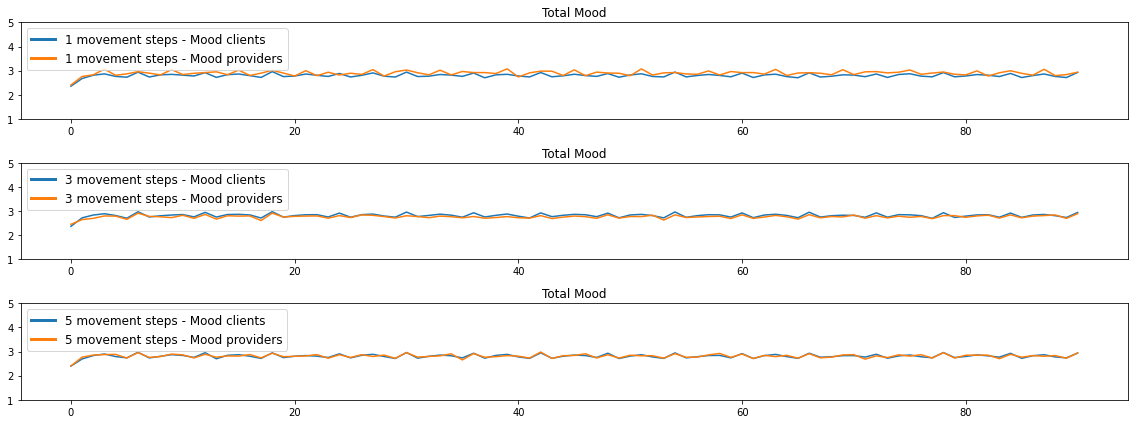

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_clients'], label='{} movement steps - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['mood_providers'], label='{} movement steps - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



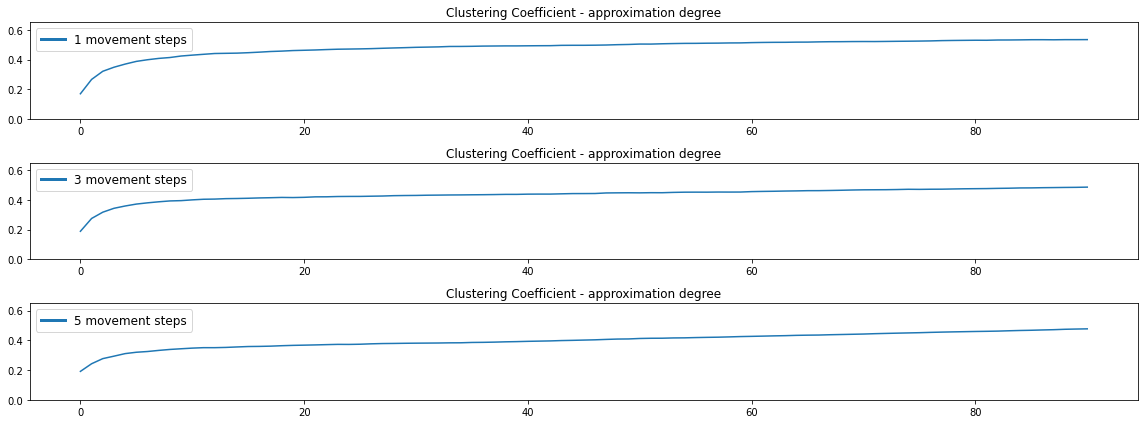

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['cluster_coef'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



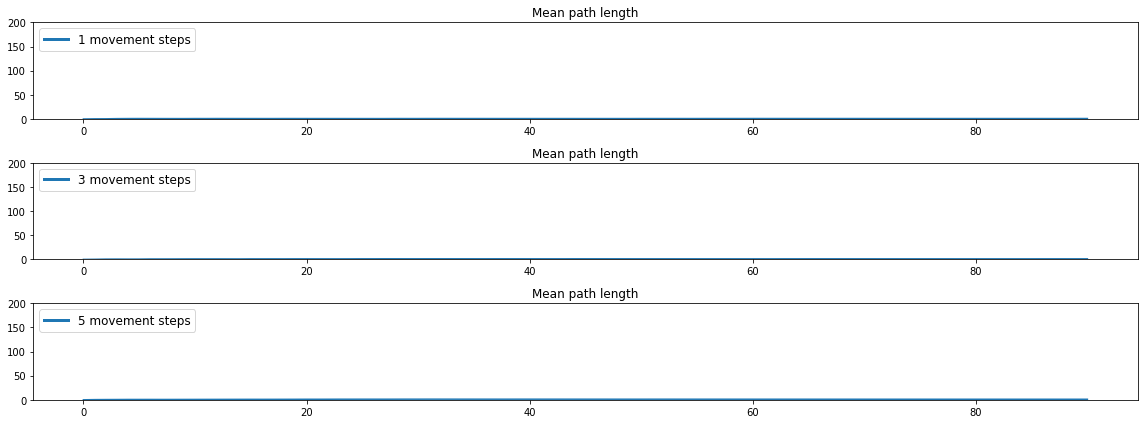

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['paths'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



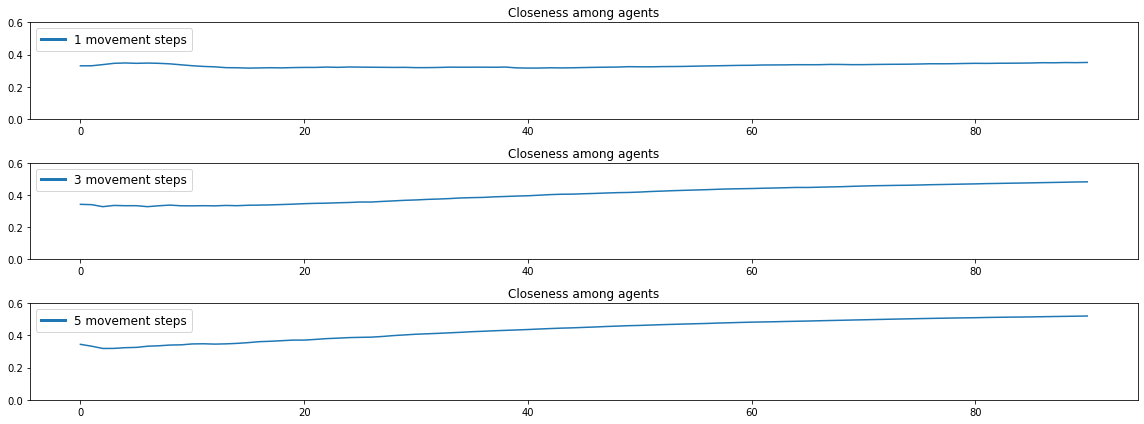

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['closeness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



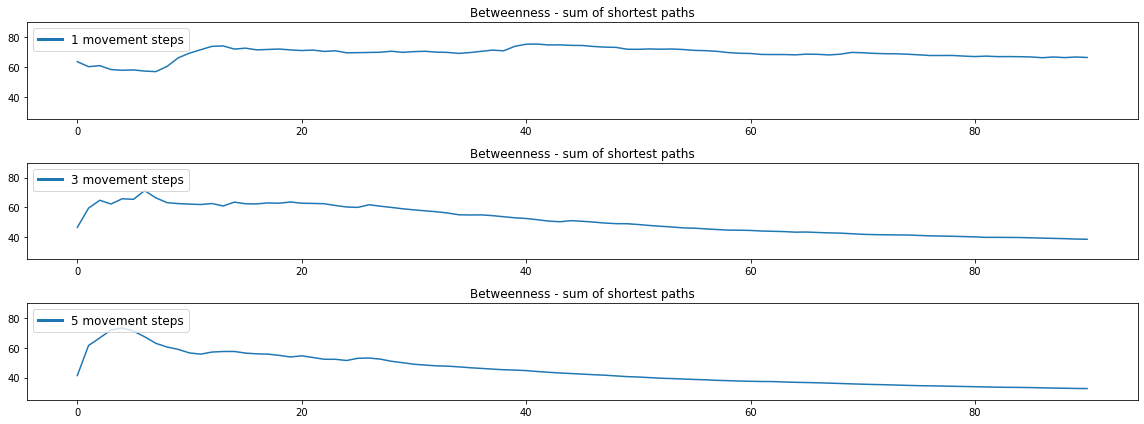

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['betweenness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(25,90)
plt.show()


In [13]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].mean()

In [14]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1]

,movement-steps,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,total_mood
0,1,0,2.358934,2.405093,0.169801,0.000000,0.330230,63.579861,0.000000,0.000000,70.018519,4.764027
1,1,1,2.676928,2.761574,0.266377,0.326172,0.330607,60.199537,-0.038029,-0.247807,94.370370,5.438502
2,1,2,2.813416,2.830247,0.321103,0.407970,0.337887,60.904167,-0.036263,-0.248155,109.018519,5.643663
3,1,3,2.867694,3.064043,0.348383,0.744667,0.345789,58.283333,-0.034431,-0.242924,121.203704,5.931737
4,1,4,2.764131,2.810185,0.369524,0.877719,0.348038,57.779398,-0.029900,-0.253219,131.462963,5.574316
...,...,...,...,...,...,...,...,...,...,...,...,...
86,1,86,2.798020,2.815586,0.533569,0.939967,0.349649,66.226389,-0.122261,-0.217340,323.111111,5.613607
87,1,87,2.863798,3.057870,0.532992,0.935578,0.349172,66.741667,-0.128048,-0.224515,324.685185,5.921668
88,1,88,2.761112,2.796296,0.533839,0.932466,0.350535,66.308333,-0.132909,-0.216182,326.351852,5.557409
89,1,89,2.717093,2.838735,0.533876,0.998259,0.350020,66.718750,-0.139622,-0.229377,327.981481,5.555827


In [15]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [16]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,-0.4543,0.6502
1,mood_providers,6.6026,0.0
2,cluster_coef,10.0246,0.0
3,paths,-6.6885,0.0
4,closeness,-15.6644,0.0
5,betweenness,20.6103,0.0
6,centroid-x,13.7033,0.0
7,centroid-y,-20.6953,0.0
8,links,-10.7141,0.0
9,total_mood,3.4699,0.0007


In [17]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,0.2063,0.6502
1,mood_providers,43.5948,0.0
2,cluster_coef,100.4929,0.0
3,paths,44.736,0.0
4,closeness,245.3744,0.0
5,betweenness,424.7858,0.0
6,centroid-x,187.7794,0.0
7,centroid-y,428.2942,0.0
8,links,114.7915,0.0
9,total_mood,12.0403,0.0007


In [18]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:45,2:].columns

Index(['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'links', 'total_mood'],
      dtype='object')

In [19]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients      0.2656
mood_providers    0.0553
cluster_coef      0.8555
paths             0.5475
closeness        -0.7638
betweenness      -0.8097
total_mood        0.9521
centroid-x       -0.8281
centroid-y       -0.4448
dtype: float64

In [20]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood','links',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f','links.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients      0.2464
mood_providers   -0.1849
cluster_coef      0.8302
paths            -0.8986
closeness         0.9713
betweenness       0.8031
total_mood        0.9939
centroid-x       -0.1836
centroid-y       -0.8220
dtype: float64

In [21]:
df_move.reset_index()

,movement-steps,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y,links,total_mood
0,1,0,2.3589,2.4051,0.1698,0.0000,0.3302,63.5799,0.0000,0.0000,70.0185,4.7640
1,1,1,2.6769,2.7616,0.2664,0.3262,0.3306,60.1995,-0.0380,-0.2478,94.3704,5.4385
2,1,2,2.8134,2.8302,0.3211,0.4080,0.3379,60.9042,-0.0363,-0.2482,109.0185,5.6437
3,1,3,2.8677,3.0640,0.3484,0.7447,0.3458,58.2833,-0.0344,-0.2429,121.2037,5.9317
4,1,4,2.7641,2.8102,0.3695,0.8777,0.3480,57.7794,-0.0299,-0.2532,131.4630,5.5743
...,...,...,...,...,...,...,...,...,...,...,...,...
268,5,86,2.8255,2.8310,0.4700,1.1275,0.5161,33.0442,-0.1899,0.1405,704.9444,5.6565
269,5,87,2.8672,2.8025,0.4718,1.1254,0.5172,32.8826,-0.1987,0.1391,709.8333,5.6697
270,5,88,2.7737,2.8326,0.4745,1.1234,0.5183,32.7755,-0.1601,0.1276,714.9444,5.6063
271,5,89,2.7370,2.7215,0.4761,1.1217,0.5193,32.6345,-0.1638,0.0720,719.8148,5.4585


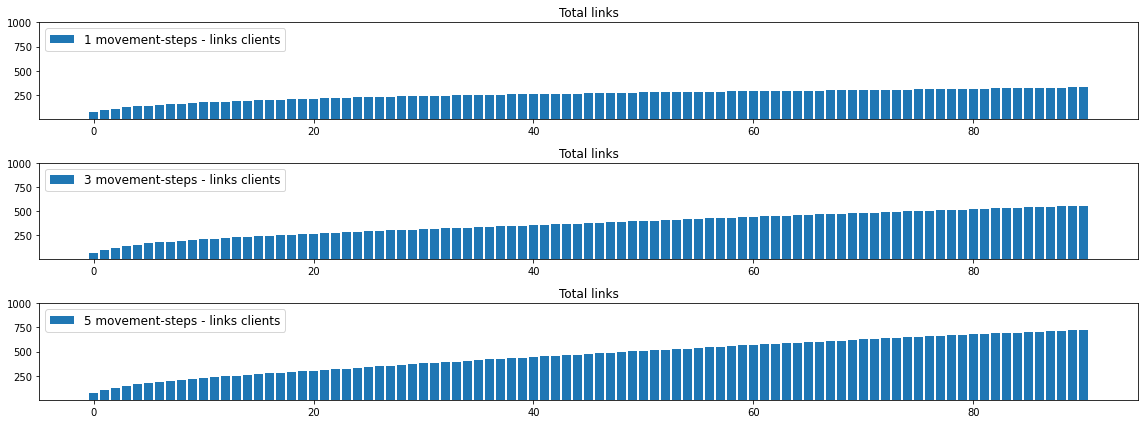

In [31]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1,3,5]:
    x=x+1
    plt.subplot(310+x)
    plt.bar(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['movement-steps']==i]['links'], label='{} movement-steps - links clients'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total links")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,1000)
plt.show()

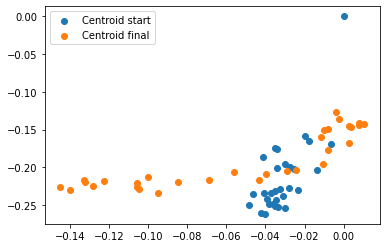

In [32]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

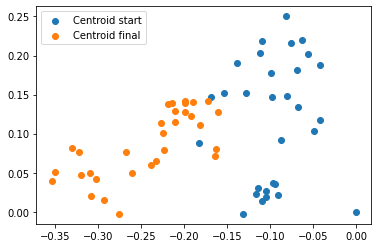

In [33]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [34]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef   paths  \
movement-steps step                                                       
1              0           2.3589          2.4051        0.1698  0.0000   
               1           2.6769          2.7616        0.2664  0.3262   
               2           2.8134          2.8302        0.3211  0.4080   
               3           2.8677          3.0640        0.3484  0.7447   
               4           2.7641          2.8102        0.3695  0.8777   
...                           ...             ...           ...     ...   
5              86          2.8255          2.8310        0.4700  1.1275   
               87          2.8672          2.8025        0.4718  1.1254   
               88          2.7737          2.8326        0.4745  1.1234   
               89          2.7370          2.7215        0.4761  1.1217   
               90          2.9353          2.9406        0.4774  1.1200   

                     closeness  betweenness  centroid-x  centroid-y     links  \
movement-steps step                                                             
1              0        0.3302      63.5799      0.0000      0.0000   70.0185   
               1        0.3306      60.1995     -0.0380     -0.2478   94.3704   
               2        0.3379      60.9042     -0.0363     -0.2482  109.0185   
               3        0.3458      58.2833     -0.0344     -0.2429  121.2037   
               4        0.3480      57.7794     -0.0299     -0.2532  131.4630   
...                        ...          ...         ...         ...       ...   
5              86       0.5161      33.0442     -0.1899      0.1405  704.9444   
               87       0.5172      32.8826     -0.1987      0.1391  709.8333   
               88       0.5183      32.7755     -0.1601      0.1276  714.9444   
               89       0.5193      32.6345     -0.1638      0.0720  719.8148   
               90       0.5204      32.5646     -0.1631      0.0801  724.2593   

                     total_mood  
movement-steps step              
1              0         4.7640  
               1         5.4385  
               2         5.6437  
               3         5.9317  
               4         5.5743  
...                         ...  
5              86        5.6565  
               87        5.6697  
               88        5.6063  
               89        5.4585  
               90        5.8759  

[273 rows x 10 columns]

/tmp/ipykernel_59862/1052004845.py:48: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


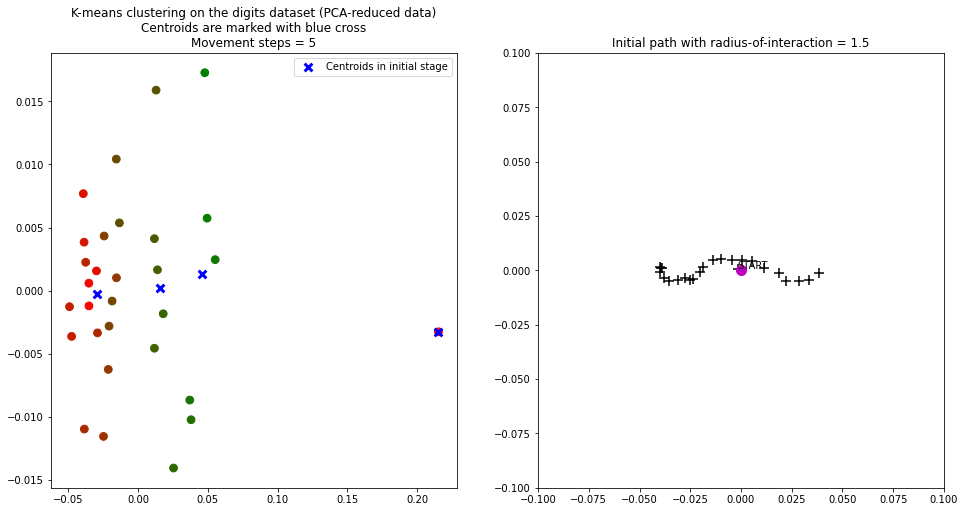

In [35]:
lag=7
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()



plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.scatter(0,0,marker='o',s=100,color='m')


plt.show()

In [36]:
df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].shape

(91, 12)

/tmp/ipykernel_59862/112140767.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


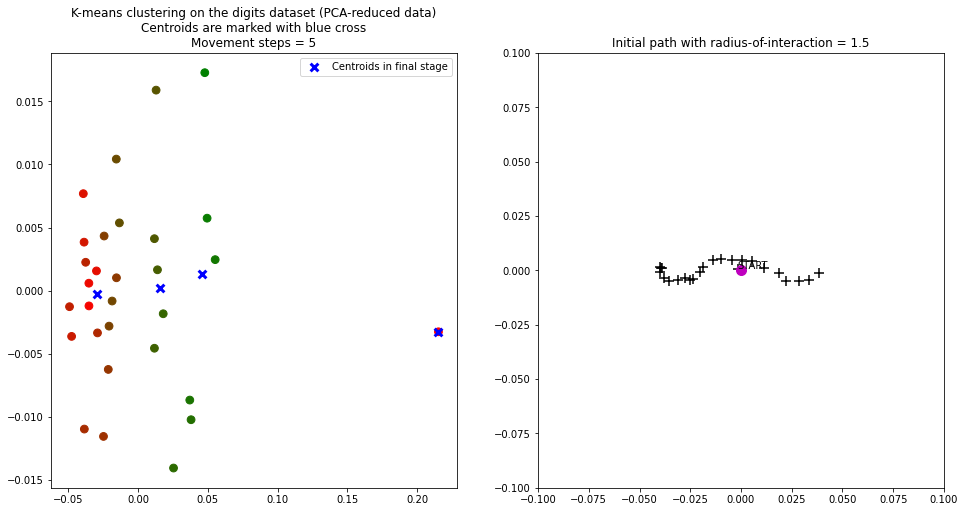

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==1].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_59862/2926621981.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


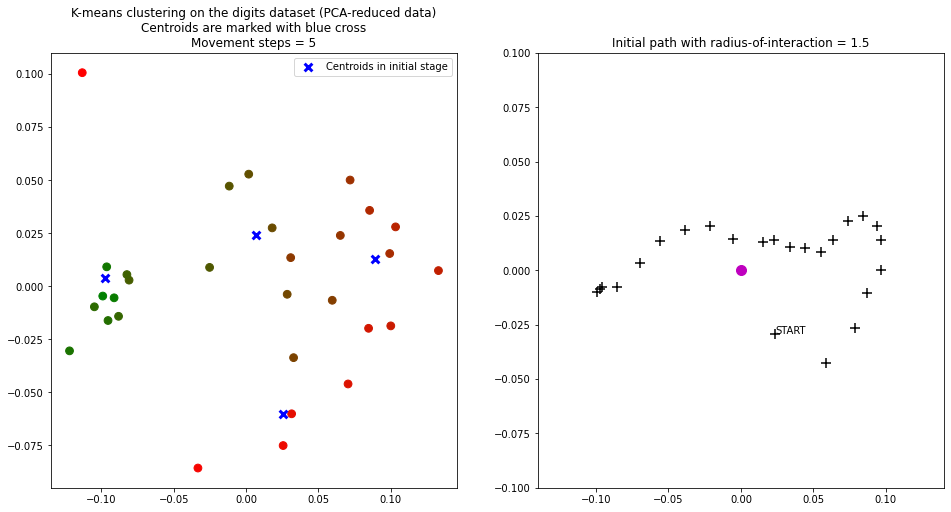

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.14,0.14)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()

/tmp/ipykernel_59862/1187996117.py:44: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


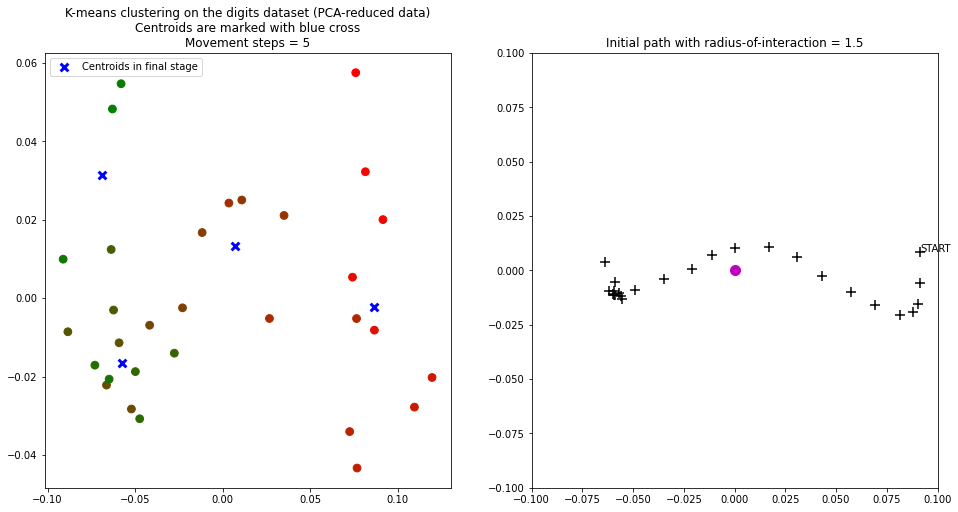

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['movement-steps']==5].iloc[60:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=30
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "Movement steps = 5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)
plt.scatter(0,0,marker='o',s=100,color='m')

plt.show()